# Final Twitter Analysis Report

By Atwine Mugume Twinamatsiko

- Project: Using Twitter Data Analysis to inform policy.
- Date: 1-Sept-2020 - 31-Oct-2020

I have used a new notebook because here I want to organize all the scattered thoughts in the rest of the notebooks in one place.

In [1]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("new_india_2.csv")

In [3]:
#I had already removed the duplicates in the data from my laptop
#What are the total dimensions of the data
data.shape

(959341, 19)

In [4]:
#let us look at the head of the data to see the columns
data.head(3)

,Tweet Id,Tweet Posted Time (UTC),text,Retweeted Screen Name,Tweet Type,Client,Retweets Received,Favourites Received,Tweet Location,Tweet Language,Name,Screen Name,Verified or Non-Verified,User Followers,User Following,Favourites Count,Statuses Count,User Account Creation Date,date
0,"""1321555606831091714""",2020-10-28 20:53:04,RT @CDCgov: Amy Kirby and Mia Mattioli are spe...,CDCgov,ReTweet,Twitter for Android,0,0,"Kampala, Uganda",English,muhoozi brian,brianmuhoozi,Non-Verified,217.0,1163.0,5442,5494.0,10 Feb 2015 16:24:25,2020-10-28 20:53:04
1,"""1316342612333391872""",2020-10-14 11:38:29,RT @US_EUCOM: The @CDC recommends you wear mas...,US_EUCOM,ReTweet,Twitter for Android,0,0,"Jinja,Uganda",English,muzira andrew,Mars694Muzira,Non-Verified,409.0,834.0,25794,16183.0,29 Aug 2014 10:31:07,2020-10-14 11:38:29
2,"""1312643559686897669""",2020-10-04 06:39:47,RT @JenniferNuzzo: ATTN close contacts of #COV...,JenniferNuzzo,ReTweet,Twitter for Android,0,0,Kampala,English,Peter Ahabwe BABIGUMIRA,ahabwe_pharma,Non-Verified,511.0,1314.0,1392,11082.0,03 Nov 2016 09:46:03,2020-10-04 06:39:47


In [5]:
#let me make a copy of the data so I can have one remain un touched
twen = data.copy(deep=True)

From here let us look at the composition of the data we have, this is more like descriptive of the kind of information that we have.

In [6]:
#first let me rename tweet content as text
twen.rename(columns={'Tweet Content':'text'},inplace=True)

In [7]:
#check if the column has changed
twen.head(3)

,Tweet Id,Tweet Posted Time (UTC),text,Retweeted Screen Name,Tweet Type,Client,Retweets Received,Favourites Received,Tweet Location,Tweet Language,Name,Screen Name,Verified or Non-Verified,User Followers,User Following,Favourites Count,Statuses Count,User Account Creation Date,date
0,"""1321555606831091714""",2020-10-28 20:53:04,RT @CDCgov: Amy Kirby and Mia Mattioli are spe...,CDCgov,ReTweet,Twitter for Android,0,0,"Kampala, Uganda",English,muhoozi brian,brianmuhoozi,Non-Verified,217.0,1163.0,5442,5494.0,10 Feb 2015 16:24:25,2020-10-28 20:53:04
1,"""1316342612333391872""",2020-10-14 11:38:29,RT @US_EUCOM: The @CDC recommends you wear mas...,US_EUCOM,ReTweet,Twitter for Android,0,0,"Jinja,Uganda",English,muzira andrew,Mars694Muzira,Non-Verified,409.0,834.0,25794,16183.0,29 Aug 2014 10:31:07,2020-10-14 11:38:29
2,"""1312643559686897669""",2020-10-04 06:39:47,RT @JenniferNuzzo: ATTN close contacts of #COV...,JenniferNuzzo,ReTweet,Twitter for Android,0,0,Kampala,English,Peter Ahabwe BABIGUMIRA,ahabwe_pharma,Non-Verified,511.0,1314.0,1392,11082.0,03 Nov 2016 09:46:03,2020-10-04 06:39:47


In [8]:
#See the percentage of tweets from the initial set that are #retweets:
RT_tweets = twen[twen['text'].str.contains("RT", na=False)]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(twen)*100)}% of all the tweets")

The percentage of retweets is 76% of all the tweets


In [9]:
#See the percentage of tweets from the initial set that have #mentions and are not retweets:
mention_tweets = twen[~twen['text'].str.contains("RT", na = False)  & twen['text'].str.contains("@", na = False)]
print(f"The percentage of mentions is {round(len(mention_tweets)/len(twen)*100)}% of all the tweets")

The percentage of mentions is 11% of all the tweets


In [10]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = twen[~twen['text'].str.contains("@", na = False)  & ~twen['text'].str.contains("RT", na = False)]
print(f"The percentage of plain text is {round(len(plain_text_tweets)/len(twen)*100)}% of all the tweets")

The percentage of plain text is 13% of all the tweets


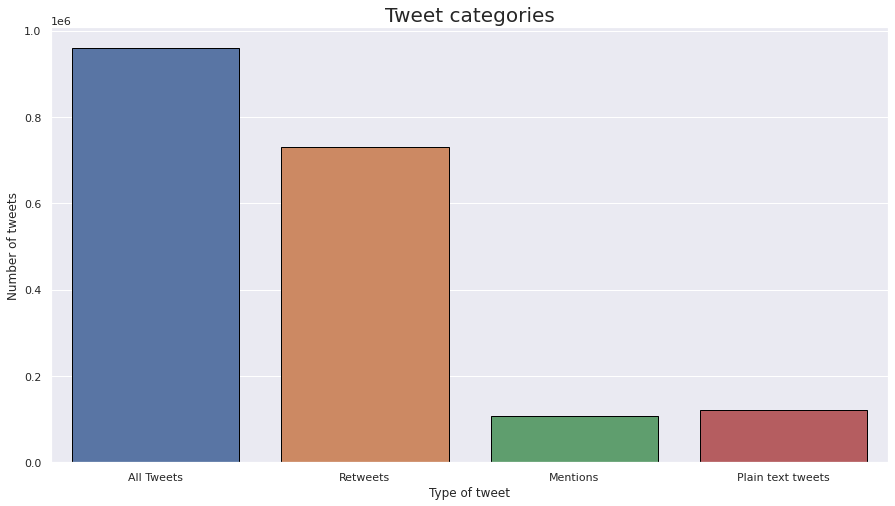

In [11]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [ len(twen), len(RT_tweets),len(mention_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [12]:
#let us check the most used hash tags

In [13]:
#if we skip this step we shall have an error compiling with regular expressions
#so this is a must if one wants to move smoothly in the analysis
twen.text = twen.text.astype('str')

In [14]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(twen['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [15]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 5 most used hashtags to plot
for item in hashtag_ordered_list[0:5]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

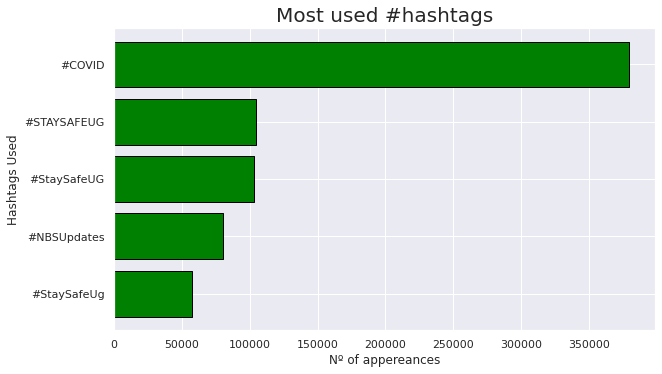

In [16]:
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (10,6))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_ylabel("Hashtags Used")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

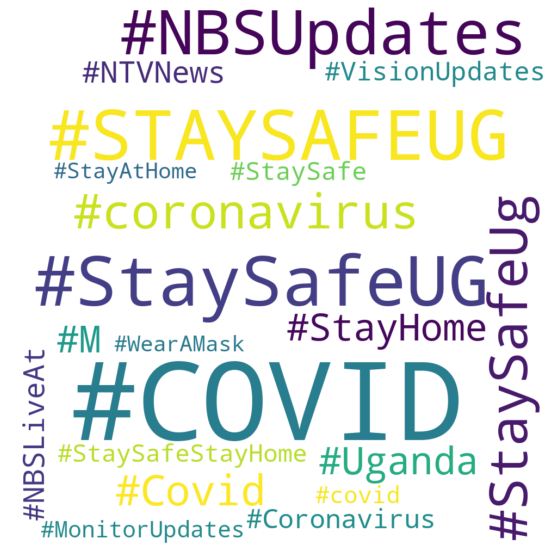

In [17]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [18]:
#tweet counts should tell us what things have been looking like per month

In [19]:
twen.head(3)

,Tweet Id,Tweet Posted Time (UTC),text,Retweeted Screen Name,Tweet Type,Client,Retweets Received,Favourites Received,Tweet Location,Tweet Language,Name,Screen Name,Verified or Non-Verified,User Followers,User Following,Favourites Count,Statuses Count,User Account Creation Date,date
0,"""1321555606831091714""",2020-10-28 20:53:04,RT @CDCgov: Amy Kirby and Mia Mattioli are spe...,CDCgov,ReTweet,Twitter for Android,0,0,"Kampala, Uganda",English,muhoozi brian,brianmuhoozi,Non-Verified,217.0,1163.0,5442,5494.0,10 Feb 2015 16:24:25,2020-10-28 20:53:04
1,"""1316342612333391872""",2020-10-14 11:38:29,RT @US_EUCOM: The @CDC recommends you wear mas...,US_EUCOM,ReTweet,Twitter for Android,0,0,"Jinja,Uganda",English,muzira andrew,Mars694Muzira,Non-Verified,409.0,834.0,25794,16183.0,29 Aug 2014 10:31:07,2020-10-14 11:38:29
2,"""1312643559686897669""",2020-10-04 06:39:47,RT @JenniferNuzzo: ATTN close contacts of #COV...,JenniferNuzzo,ReTweet,Twitter for Android,0,0,Kampala,English,Peter Ahabwe BABIGUMIRA,ahabwe_pharma,Non-Verified,511.0,1314.0,1392,11082.0,03 Nov 2016 09:46:03,2020-10-04 06:39:47


In [20]:
#I am going to create a new column called date and make it the index
twen['date'] = pd.to_datetime(twen['Tweet Posted Time (UTC)'])


In [21]:
#after I convert the time to date time
#I need the column below because once I make the date column index I will still need to get months
#the issue is that the index is not considered a column so I can reference from it. Hence the col below
twen['Tweet Posted Time (UTC)'] = pd.to_datetime(twen['Tweet Posted Time (UTC)'])

In [22]:
#now I am going to change the index to Date
twen.set_index('date', inplace = True)

In [23]:
twen.rename(columns={'Tweet Posted Time (UTC)':'time'},inplace=True)
twen.head(2)

,Tweet Id,time,text,Retweeted Screen Name,Tweet Type,Client,Retweets Received,Favourites Received,Tweet Location,Tweet Language,Name,Screen Name,Verified or Non-Verified,User Followers,User Following,Favourites Count,Statuses Count,User Account Creation Date
date,,,,,,,,,,,,,,,,,,
2020-10-28 20:53:04,"""1321555606831091714""",2020-10-28 20:53:04,RT @CDCgov: Amy Kirby and Mia Mattioli are spe...,CDCgov,ReTweet,Twitter for Android,0,0,"Kampala, Uganda",English,muhoozi brian,brianmuhoozi,Non-Verified,217.0,1163.0,5442,5494.0,10 Feb 2015 16:24:25
2020-10-14 11:38:29,"""1316342612333391872""",2020-10-14 11:38:29,RT @US_EUCOM: The @CDC recommends you wear mas...,US_EUCOM,ReTweet,Twitter for Android,0,0,"Jinja,Uganda",English,muzira andrew,Mars694Muzira,Non-Verified,409.0,834.0,25794,16183.0,29 Aug 2014 10:31:07


In [24]:
#tweet counts of words containing corona or covid per months

#lets create a day variable
twen['Day'] = twen.time.dt.date

twen['Hour'] = twen.time.dt.hour

#this is a visual of the total tweets per hour for the data we have.
twen['WeekDay'] = twen.time.dt.day_name()

In [25]:
twen.head(4)

,Tweet Id,time,text,Retweeted Screen Name,Tweet Type,Client,Retweets Received,Favourites Received,Tweet Location,Tweet Language,...,Screen Name,Verified or Non-Verified,User Followers,User Following,Favourites Count,Statuses Count,User Account Creation Date,Day,Hour,WeekDay
date,,,,,,,,,,,,,,,,,,,,,
2020-10-28 20:53:04,"""1321555606831091714""",2020-10-28 20:53:04,RT @CDCgov: Amy Kirby and Mia Mattioli are spe...,CDCgov,ReTweet,Twitter for Android,0,0,"Kampala, Uganda",English,...,brianmuhoozi,Non-Verified,217.0,1163.0,5442,5494.0,10 Feb 2015 16:24:25,2020-10-28,20.0,Wednesday
2020-10-14 11:38:29,"""1316342612333391872""",2020-10-14 11:38:29,RT @US_EUCOM: The @CDC recommends you wear mas...,US_EUCOM,ReTweet,Twitter for Android,0,0,"Jinja,Uganda",English,...,Mars694Muzira,Non-Verified,409.0,834.0,25794,16183.0,29 Aug 2014 10:31:07,2020-10-14,11.0,Wednesday
2020-10-04 06:39:47,"""1312643559686897669""",2020-10-04 06:39:47,RT @JenniferNuzzo: ATTN close contacts of #COV...,JenniferNuzzo,ReTweet,Twitter for Android,0,0,Kampala,English,...,ahabwe_pharma,Non-Verified,511.0,1314.0,1392,11082.0,03 Nov 2016 09:46:03,2020-10-04,6.0,Sunday
2020-09-25 11:17:03,"""1309451847082672130""",2020-09-25 11:17:03,RT @healthgovau: This daily infographic provid...,healthgovau,ReTweet,Twitter for Android,0,0,"Kampala, Uganda",English,...,australia_u,Non-Verified,23.0,51.0,286,84.0,23 Aug 2020 10:20:33,2020-09-25,11.0,Friday


<AxesSubplot:title={'center':'Tweet Count Per Week Day'}, xlabel='WeekDay', ylabel='Tweet Count'>

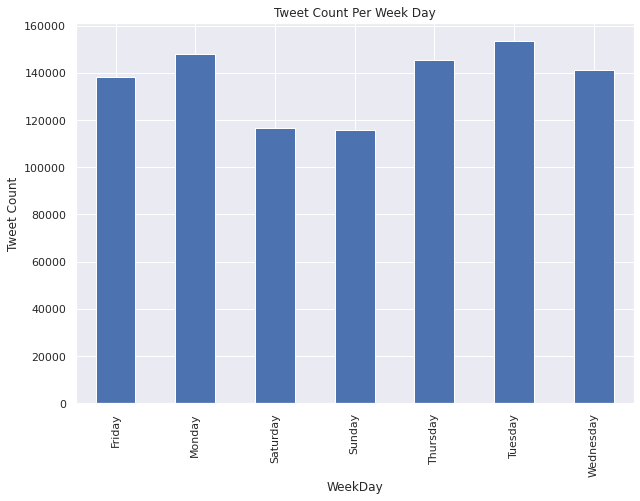

In [26]:
plt.figure(figsize = (10,7))
plt.title("Tweet Count Per Week Day")
plt.ylabel("Tweet Count")
twen.groupby('WeekDay').count()['Tweet Id'].plot(kind = 'bar')

<AxesSubplot:title={'center':'Count of Tweets Per Hour'}, xlabel='Hour', ylabel='Count Per Hour'>

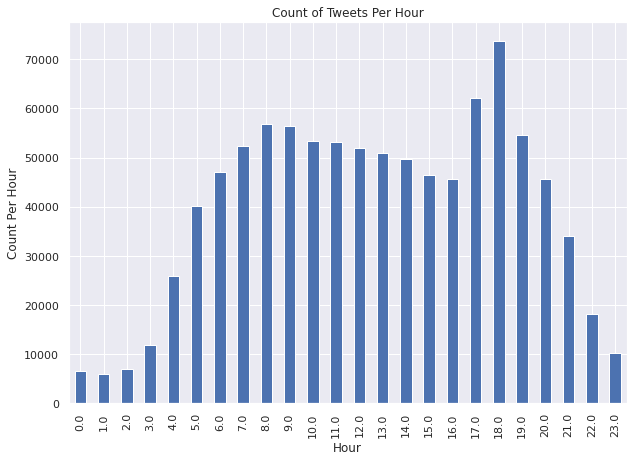

In [27]:
plt.figure(figsize = (10,7))
plt.title("Count of Tweets Per Hour")
plt.ylabel("Count Per Hour")
twen.groupby('Hour').count()['Tweet Id'].plot(kind ='bar')

<AxesSubplot:title={'center':'Tweet Count Per Month'}, xlabel='Month', ylabel='Tweet Count'>

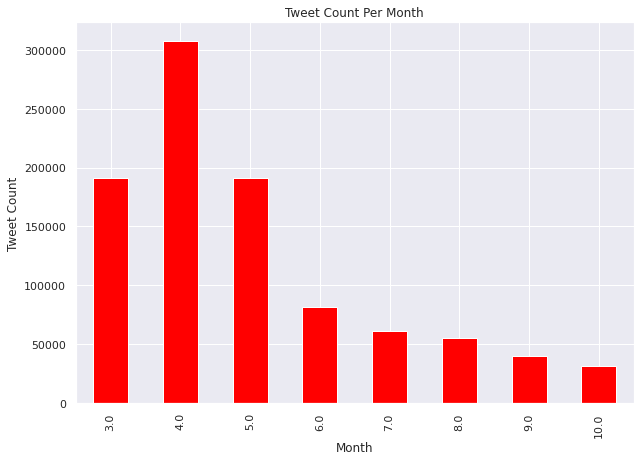

In [28]:
#this is a visual of the total tweets per day for the data we have.
plt.figure(figsize = (10,7))
plt.title("Tweet Count Per Month")
plt.ylabel("Tweet Count")
twen['Month'] = twen.time.dt.month

twen.groupby('Month').count()['Tweet Id'].plot(kind ='bar',grid=True, color='red')

In [29]:
#what is the total number of tweets concerning corona

In [30]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    return contains_column

In [31]:
sum(check_word_in_tweet('corona',twen))/twen.shape[0]*100 +\
sum(check_word_in_tweet('covid',twen))/twen.shape[0]*100 

#this is the percentage of the data that contains covid and corona information.

77.92693109123867

In [32]:
#sentiment analysis

In [33]:
#convert tweets to lower case
twen['preprocess_data'] = twen['text'].str.lower()

In [34]:
#url removes
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','')
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'www\.\S+\.com','')

In [35]:
#removes retweets & cc
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'rt|cc', '')

In [36]:
#hashtags removes 
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'#\S+', '')

In [37]:
#user mention removes
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'@\S+', '')

In [38]:
#emoji 
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'[^\x00-\x7F]+', '')

In [39]:
#html tags
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'<.*?>', '')

In [40]:
#removes extra spaces
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r' +', ' ')

In [41]:
#removes integers
twen['preprocess_data'] = twen['preprocess_data'].str.replace(r'[0-9]', ' ')

In [42]:
import string
#punctuation
twen['preprocess_data'] = twen['preprocess_data'].str.replace('[{}]'.format(string.punctuation), '')

In [43]:
from nltk.corpus import stopwords
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['retweet','e','your','amp','uganda','still','ugandan','without','take','say','us','guy','let','let','said','come','going','even']

In [44]:
#stop words removes
twen['preprocess_data'] = twen['preprocess_data'].apply(lambda x: [item for item in x.split() if item not in stop])

In [45]:
#here we create a new column which combines the string pattern that was split in the data
twen['preprocess_str'] = twen['preprocess_data'].apply(' '.join)

In [46]:
twen['preprocess_str']

date
2020-10-28 20:53:04    amy kirby mia mattioli specialists wastewater ...
2020-10-14 11:38:29    recommends wear masks public settings around p...
2020-10-04 06:39:47    attn close contacts cases supposed quarantine ...
2020-09-25 11:17:03    daily infographic provides quick view current ...
2020-09-23 19:13:37    govt last week updated survival rates ie infec...
                                             ...                        
2020-03-02 08:35:16                                   first thing salary
2020-03-02 06:34:51    foreigners isolated entebbe hospital signs say...
2020-03-01 20:06:37                             dont read lot read psalm
2020-03-01 12:47:57                     almost getting cure corona virus
2020-03-01 01:50:53    policy team analysing sho long term multisecto...
Name: preprocess_str, Length: 959341, dtype: object

## Split the months so that we can  bring out all the word cloud

In [47]:
#I want to remove the retweets so we don't have repetitions

In [48]:
#twen = twen[twen['Tweet Type'] =='Tweet'] #I am removing the retweets because they may cause more
#words to appear than necessary.

In [49]:
before = [3.0]
during = [4.0,5.0,6.0,7.0]
after = [8.0,9.0,10.0]

In [50]:
# twen[twen.Month == 3.0]

In [51]:
#filtering the months so we can have them in different categories.
#this was the request of Dr. Agnes so we can see the differences.
bfr = twen[twen['Month'].isin(before)]
dur = twen[twen['Month'].isin(during)]
aft = twen[twen['Month'].isin(after)]

## Before

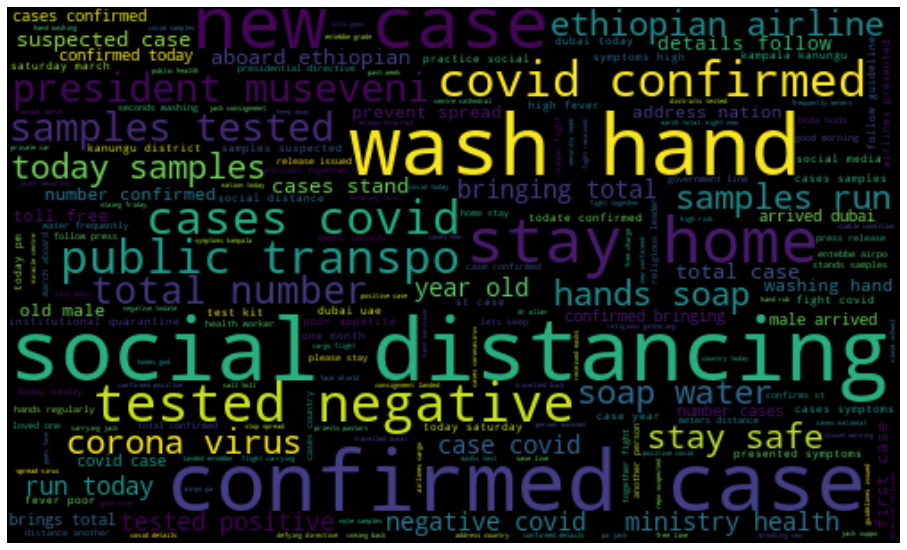

In [52]:
from wordcloud import WordCloud

from collections import Counter
#word cloud from the previous analysis
# word cloud visualization
allWords = ' '.join([twts for twts in bfr['preprocess_str']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(16,10))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# During

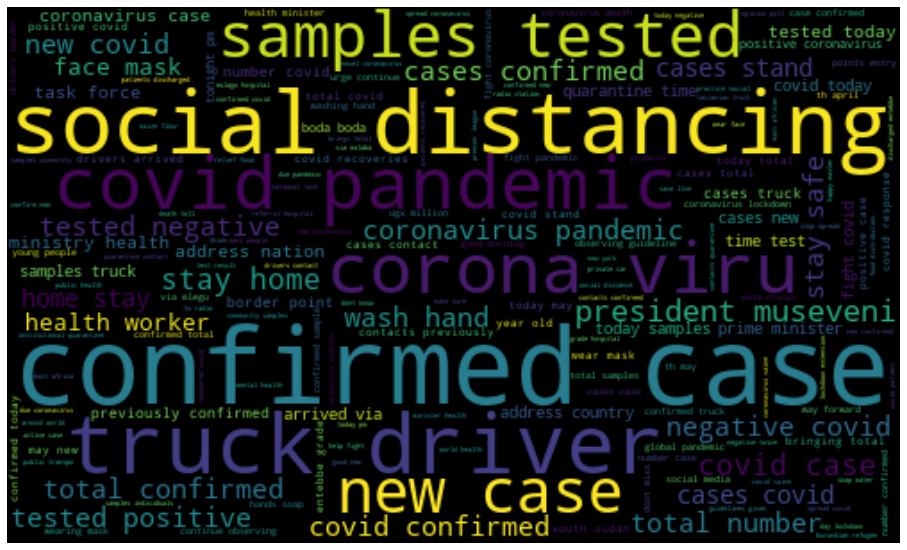

In [53]:
from collections import Counter
#word cloud from the previous analysis
# word cloud visualization
allWords = ' '.join([twts for twts in dur['preprocess_str']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(16,10))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
[]

[]

# After

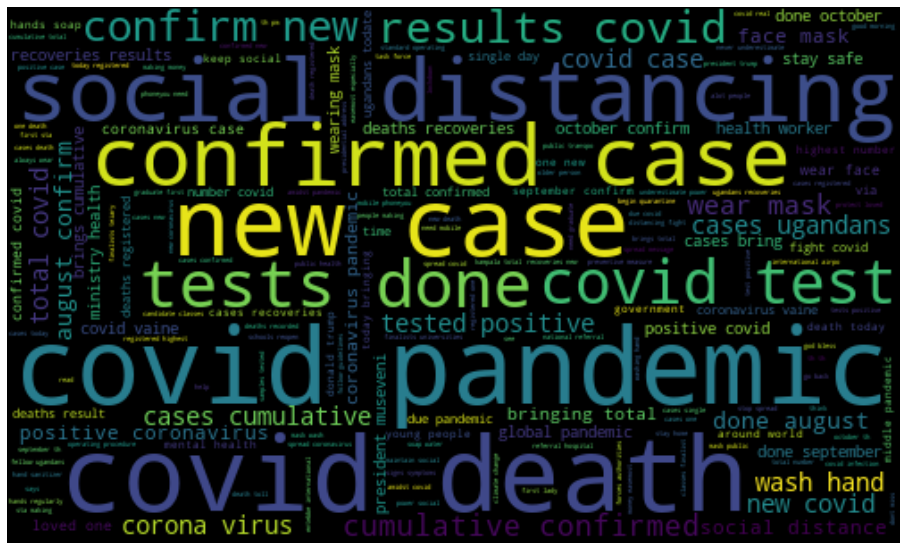

In [55]:
from collections import Counter
#word cloud from the previous analysis
# word cloud visualization
allWords = ' '.join([twts for twts in aft['preprocess_str']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(16,10))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [56]:
len(allWords)

12937816

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.tokenize import word_tokenize 

In [58]:
# Getting trigrams  
vectorizer = CountVectorizer(ngram_range = (30,30)) 
X1 = vectorizer.fit_transform(twen['preprocess_str'])  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 



Features : 
 ['aba nrm mwe abaleese corona virus doctor jane ruth aceng spear head fight gave country go ahead openly gathering multitudes anitemukula musevenis brother senior nrm state favored guys openly gathering', 'abaana bakubye ssente za corona anyway effective th april ill joining ldu serve nation passion clowning health sector may concern please aord necessary suppo tenure ldu god bless bums backs', 'abt lemme teach smthn tude dyu know ur dyu know ur black dyu know born america dyu know ur called name god aint mad yall whites done shame broad light', 'abt yo unborn baby en may gods hand heal yo wife praying quick recovery en wat wea talking abt concentration much corona en hv forgotten critical issues need medical attention', 'abusing muslims christians islam muslim women posting antimuslim corona virus spread muslims name kahik poojary fb id link kahik kumar works solas marine services co llc abu dhabi uae changed', 'aceng truck drivers country mobilised testing kololo airst

In [59]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (30,30)) 
X2 = vectorizer.fit_transform(twen['preprocess_str']) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores)

KeyboardInterrupt: 

In [ ]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(15)) 

# Topic modeling

In [ ]:
#this is the number of unique users in the dataset.
twen['Screen Name'].nunique()

# Natural Language Processing

In [ ]:
from textblob import TextBlob

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [ ]:
# Create two new columns 'Subjectivity' & 'Polarity'
twen['Subjectivity'] = twen['preprocess_str'].apply(getSubjectivity)
twen['Polarity'] = twen['preprocess_str'].apply(getPolarity)

In [ ]:
twen.head(3)

In [ ]:
plt.figure(figsize = (10,6))
plt.title("General Sentiments")
twen.Analysis.value_counts().plot(kind = 'bar')

In [ ]:
#sentiment distribution

#plot the distribution of the sentiment

plt.figure(figsize=(12,8))
sns.distplot(twen['Polarity'])
plt.yscale('log')
plt.title("Sentiment Distribution",{'size':14})
plt.ylabel("Frequency")

In [ ]:
#split the label datasets
z = twen[twen['Analysis']=='Positive']
v = twen[twen['Analysis']=='Negative']

plt.figure(figsize=(12,8))
sns.distplot(z['Polarity'], label = 'Positive')
sns.distplot(v['Polarity'], label = 'Negative')
plt.yscale('log')
plt.title("Distribution of the sentiment", {'size':16})
plt.grid()
plt.ylabel("Frequency", {'size':14})
plt.legend(['Positive','Negative'])


In [ ]:
#weekly polarity
#tm = data['Polarity'].resample('1 B').mean()
tmd = twen['Polarity'].resample('1 D').mean()
tmw = twen['Polarity'].resample('1 W').mean()
tmm = twen['Polarity'].resample('1 M').mean()


In [ ]:
#Function for Moving Average
#this is so that I can make the curves in the plots smooth.
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [ ]:
#apply the moving average function
#movingaverage(tmd.values,5)

In [ ]:
sns.relplot(x=tmd.index, y=tmd.values, kind="line",aspect=3 ,data=tmd)
plt.title("Timeseries of Sentiment Analysis, Daily")
plt.ylabel("Sentiment Score")

- The graph below is the same as that above only using the previous function of moving averages, the reason why is that i want to make the curve smoother than the noisy one above.

In [ ]:
#this is the plot with moving average of 10 (this is the same as above)
sns.relplot(x=tmd.index, y=movingaverage(tmd.values,10), kind="line",aspect=3 ,data=tmd)
plt.title("Timeseries of Sentiment Analysis, Daily")
plt.ylabel("Sentiment Score")

- The one below I used the function : rolling that is applied to series over a period or window of 15 to try and make the curver smooth, i will also try the 20 window to see if it can become smoother.

In [ ]:
sns.relplot(x=tmd.index, y=tmd.rolling(20).mean(), kind="line",aspect=3 ,data=tmd)
plt.title("Timeseries of Sentiment Analysis, Daily")
plt.ylabel("Sentiment Score")

- Sentiment Analysis Weekly 

In [ ]:
sns.relplot(x=tmw.index, y=tmw.values, kind="line",aspect=3 ,data=tmw)
plt.title("Timeseries of Sentiment Analysis, Weekly")
plt.ylabel("Sentiment Score")

#i applied moving average over 5 data points to kind of make the curve less pointy

In [ ]:
#running this with the rolling mean function applied to series
sns.relplot(x=tmw.index, y=tmw.rolling(10).mean(), kind="line",aspect=3 ,data=tmw)
plt.title("Timeseries of Sentiment Analysis, Weekly")
plt.ylabel("Sentiment Score")

- Below is the Sentiment Analysis over the months applying rolling mean of window 3

In [ ]:

#sns.relplot(x=tm.index, y=tm.values, kind="line",aspect=3 ,data=tm)
sns.relplot(x=tmm.index, y=tmm.rolling(3).mean(), kind="line",aspect=3 ,data=tmm)
plt.title("Timeseries of Sentiment Analysis, Monthly")
plt.ylabel("Sentiment Score")

In [ ]:
#this is taking out information that have the word corona in it
twen['corona'] = check_word_in_tweet('corona',twen)

mean_coronax = twen['corona'].resample('M').mean()

In [ ]:
#let us also run the covid related tweets
twen['covid'] = check_word_in_tweet('covid',twen)

mean_covid = twen['covid'].resample('M').mean()

In [ ]:
#applied rolling mean over a period of 2 datapoints
sns.relplot(x=mean_covid.index, y=mean_covid.rolling(2).mean(), kind="line",aspect=2 ,data=tmm)

plt.title("Time Series showing the mean count of COVID related tweets over the months")
plt.ylabel("Mean Count")

In [ ]:
#apply rolling mean over 3 datapoints
sns.relplot(x=mean_coronax.index, y=mean_coronax.rolling(3).mean(), kind="line",aspect=2 ,data=tmm)
plt.title("Time Series showing the mean count of corona related tweets over the months")
plt.ylabel("Mean Count")

#I am not seeing the results for the month of march and April, could it mean that the results that are there are not
#computing properly?

#This graph shows the count of all the tweets that have corona in them

In [ ]:
mean_coronaw = twen['corona'].resample('W').mean()

mean_coronad = twen['corona'].resample('D').mean()

In [ ]:
sns.relplot(x=mean_coronad.index, y=mean_coronad.values, kind="line",aspect=2 ,data=tmm)
plt.title("Mean Corona Related count daily")
plt.ylabel("Mean Count")

In [ ]:
sns.relplot(x=mean_coronaw.index, y=mean_coronaw.values, kind="line",aspect=2 ,data=tmm)
plt.title("Mean Corona Related count weekly")
plt.ylabel("Mean Count")

In [ ]:
#draw the general subjectivity over time
#draw the general subjectivity over time

sub = twen['Subjectivity'].resample('1 W').mean()
sns.relplot(x=sub.index, y=sub.rolling(6).mean(), kind="line",aspect=3 ,data=tmd)
plt.title("Mean Subjectivity in Weeks")
plt.ylabel("Value")

'''
Subjectivity : can the information that was tweeted be trusted or not? Is it based on facts or 
its based on speculation, this is the question subjectivity tries to answer.

When subjectivity is high then there is high opinion and no facts, when its low then we have more trusted information

'''

In [ ]:
#should draw subjectivity vs polarity on the same axis

#I shall continue from here to look at other forms of graphs that I am going to draw.

#I will be looking at the proper text analysis notebook

In [ ]:
#working with the covid cases

In [ ]:
cases = pd.read_csv('covid_cases.csv')

In [ ]:
cases.Date = pd.to_datetime(cases['Date'])

In [ ]:
cases.set_index('Date',inplace=True)

In [ ]:
cases.head(3)

In [ ]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Months', fontsize=12)
ax1.set_ylabel('Cumlative Confirmed Deaths', fontsize=12)
l1 = ax1.plot(cases.index,np.cumsum(cases['Number of Deaths']), color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mean Covid Sentiment Per Month', fontsize=12)  # we already handled the x-label with ax1
l2 = ax2.plot(mean_coronax.index,mean_coronax.values, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Confirmed Deaths vs COVID Sentiment",fontweight = 'bold') #make the titles bold


#legend
plt.legend([l1, l2],['Cumlative Confirmed Deaths', 'Mean Covid Sentiment Per Month'],loc="upper right")
#make the axes thicker.
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# We change the fontsize of minor ticks label 

ax1.tick_params(axis='both', which='minor', labelsize=7)

plt.show()

- Dr Agnes needed the graphs above all showing a mean progression over a period of weeks.
- She said comparing mean and cumsum did not make much sense at all.

Therefore, I have to change the time series for both to weeks so we can see how they change accordingly.

In [ ]:
#corona weekly
mean_corona_w = twen['corona'].resample('W').mean()

In [ ]:
#cases weekly mean
cases_weekly = cases['Reported Confirmed Cases'].resample('W').mean()

In [ ]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Months', fontsize=12)
ax1.set_ylabel('Cumlative Confirmed Deaths', fontsize=12)
#on the line below I changed the y value into a rolling mean so that its easy to compare.
l1 = ax1.plot(cases.index,cases['Number of Deaths'].rolling(7).mean(), color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mean Covid Sentiment Per Month', fontsize=12)  # we already handled the x-label with ax1

#on the line below I changed the y-value to a rolling mean so that its better to compare
l2 = ax2.plot(mean_corona_w.index,mean_corona_w.rolling(7).mean(), color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Confirmed Deaths vs COVID Sentiment",fontweight = 'bold') #make the titles bold


#legend
plt.legend([l1, l2],['Cumlative Confirmed Deaths', 'Mean Covid Sentiment Per Month'],loc="upper right")
#make the axes thicker.
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# We change the fontsize of minor ticks label 

ax1.tick_params(axis='both', which='minor', labelsize=7)

plt.show()

In [ ]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Months', fontsize=12)
ax1.set_ylabel('Cumlative Reported Confirmed Cases', fontsize=12)
l1 = ax1.plot(cases.index,np.cumsum(cases['Reported Confirmed Cases']), color=color, linewidth = 3)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mean Covid Sentiment Per Month', fontsize=12)  # we already handled the x-label with ax1
l2 = ax2.plot(mean_coronax.index,mean_coronax.values, color=color, linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Reported Confirmed Cases vs COVID Sentiment",fontweight = 'bold') #make the titles bold

#legend
plt.legend([l1, l2],['Cumlative Confirmed Deaths', 'Mean Covid Sentiment Per Month'],loc="upper right")
#make the axes thicker.
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# We change the fontsize of minor ticks label 

ax1.tick_params(axis='both', which='minor', labelsize=7)

plt.show()

In [ ]:
sns.relplot(x=cases.index, y = np.cumsum(cases['Reported Confirmed Cases']),kind='line', data=cases, aspect=3)
plt.title('Cumlative Reported Confirmed Cases')

In [ ]:
#resample by weeks cases
cases_conf = cases['Reported Confirmed Cases'].resample('1 W').mean()
death_conf = cases['Number of Deaths'].resample('1 W').mean()
#resample by weeks polarity
polarity = twen['Polarity'].resample('1 W').mean()
Subjectivity = twen['Subjectivity'].resample('1 W').mean()

In [ ]:
cases_conf.shape, death_conf.shape, polarity.shape, Subjectivity.shape

In [ ]:
sns.relplot(x = death_conf.values, y = polarity.values[:33], aspect=2)
plt.title("Relationship Between Sentiment & Confirmed Cases")
plt.xlabel("Number of Deaths")
plt.ylabel("Sentiment")

In [ ]:
#the reasons I am taking only the first thirty values is because I have some nas in the death values
#and there in an imbalance in the length of the arrays so I have to choose a matching value 30
np.corrcoef(death_conf.values[:30],polarity.values[:30])

In [ ]:
#I want to take a look at the data and see what it looks like now.
#I want to take this same data and do sentence similarity with it

In [ ]:
twen.head(5)

In [ ]:
twen['preprocess_str'].head(10)

# Geo Data

Here I am going to split the data based on districts so that we can see which districts are using twitter the most and so we can know where its very active and less active.

# Influencer Analysis

I will run this last because it takes a lot of time to run.

It is good to read this artile before presentation.[Network Article](https://towardsdatascience.com/applied-network-analysis-using-python-25021633a702)

In [ ]:
twen.head(2)

In [ ]:
twen.columns

In [ ]:
sotu_retweetsx = twen[['Screen Name','Retweeted Screen Name']]

In [ ]:
sotu_retweetsx.dropna(inplace=True)

In [ ]:
#import the necessary library
import networkx as nx

In [ ]:
# Create retweet network from edgelist
G_rtx = nx.from_pandas_edgelist(
    sotu_retweetsx,
    source = 'Screen Name', 
    target = 'Retweeted Screen Name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rtx.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rtx.edges()))

In [ ]:
# Create random layout positions
plt.figure(figsize= (18,16))
plt.title('Network Graph for retweets with the context of COVID')
pos = nx.random_layout(G_rt)

# Create size list
sizes = [5*(x[1]) for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.5, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

#we can see that there are some major players in these retweet graphs.
#we can make more sense of this in a way that we can see who the big players are
#what they are talking about in this time.


In [ ]:
column_names = ['screen_name', 'degree_centrality']
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rtx)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())


In [ ]:
 dfcx = rt.sort_values('degree_centrality', ascending = False).head(10)

In [ ]:
plt.figure(figsize = (10,7))
plt.title('Biggest influencers User_names:', {'size':16})
plt.bar(dfcx['screen_name'],dfcx['degree_centrality'],color=(0.2, 0.4, 0.6, 0.6),edgecolor='red')
plt.xlabel("User_name", {'size':16})
plt.ylabel("Centrality",{'size':16})
plt.xticks(rotation = 90)


In [ ]:
#the cells below take a long time to run

# Better Influencer Analysis.

In [ ]:
twen.head()

In [ ]:
twen.columns

In [ ]:
try:
    twen[['User Followers','User Following','Favourites Count','Statuses Count']] = twen[['User Followers','User Following','Favourites Count','Statuses Count']].fillna(0).astype('int')
except ValueError:
    pass

In [ ]:
twen[['User Followers','User Following','Favourites Count','Statuses Count']].head(3)

In [ ]:
#I wrote these codes separate not in a function because I wanted to trace the errors individually
twen['follow_ratio'] = twen['User Following']/twen['User Followers']

In [ ]:
# I had to drop one value that had wrong index
twen.drop(index = (twen[twen['Favourites Count']=='26 Feb 2012 01:57:13'].index),inplace=True)

In [ ]:
twen['engagement'] = twen['Favourites Count'].astype('float')/twen['Statuses Count']

In [ ]:
twen['User Account Creation Date'] = pd.to_datetime(twen['User Account Creation Date'])


In [ ]:
twen['acc_age']=2020- twen['User Account Creation Date'].dt.year

In [ ]:
twen.columns

twen.to_csv('updated_data_2',index=False)

In [ ]:
twen[['follow_ratio','engagement']].head()

In [ ]:
infd = twen.loc[(twen.follow_ratio<0.3) & (twen.engagement>1.5) & (twen.acc_age>5)]


In [ ]:
infd.shape

In [ ]:
sotu_retweets = infd[['Screen Name','Retweeted Screen Name']]

In [ ]:
sotu_retweets.dropna(inplace=True)

In [ ]:
#import the necessary library
import networkx as nx

In [ ]:
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'Screen Name', 
    target = 'Retweeted Screen Name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

In [ ]:
# Create random layout positions
plt.figure(figsize= (18,16))
plt.title('Network Graph for retweets with the context of COVID')
pos = nx.random_layout(G_rt)

# Create size list
sizes = [5*(x[1]) for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.5, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

#we can see that there are some major players in these retweet graphs.
#we can make more sense of this in a way that we can see who the big players are
#what they are talking about in this time.


In [ ]:
column_names = ['screen_name', 'degree_centrality']
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())


In [ ]:
#betweeness centrality
#who is the person that is the most important: like a middle person of communication
column_namez = ['screen_name', 'betweenness_centrality']

# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_namez)

# Print first five results in descending order of centrality
print(rt.sort_values('betweenness_centrality', ascending = False).head())

In [ ]:
 dfc = rt.sort_values('betweenness_centrality', ascending = False).head(10)

In [ ]:
plt.figure(figsize = (10,7))
plt.title('Betweeness Centrality: people who are at the center of information flow', {'size':16})
plt.bar(dfc['screen_name'],dfc['betweenness_centrality'],color=(0.2, 0.4, 0.6, 0.6),edgecolor='red')
plt.xlabel("User_name", {'size':16})
plt.ylabel("Centrality",{'size':16})
plt.xticks(rotation = 90)


In [ ]:
# twen.to_csv("twen.csv",index=False) #I want to keep the already sorted data